In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st 
import random
from citipy import citipy
from api_keys import (weather_api_key, gkey)

units = 'imperial'
query_url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q='


In [2]:
# Generate Cities List
cities = []

# Generate random coordinates
lat = np.random.uniform(low = -90, high = 90, size=2000)
long = np.random.uniform(low = -180, high = 180, size=2000)
coordinates = list(zip(lat, long))

# For every set of coordinates:
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
print(len(cities))


756


In [3]:
# Perform API calls

# for city in cities:
#     raw_data = requests.get(query_url + city).json()
    
# print(raw_data)


raw_data = requests.get(query_url + 'denver').json()

print(raw_data)

{'coord': {'lon': -104.9847, 'lat': 39.7392}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 74.52, 'feels_like': 74.53, 'temp_min': 69.31, 'temp_max': 80.67, 'pressure': 1011, 'humidity': 61}, 'visibility': 10000, 'wind': {'speed': 1.01, 'deg': 290, 'gust': 3}, 'clouds': {'all': 100}, 'dt': 1626296780, 'sys': {'type': 2, 'id': 2004334, 'country': 'US', 'sunrise': 1626263028, 'sunset': 1626316047}, 'timezone': -21600, 'id': 5419384, 'name': 'Denver', 'cod': 200}


In [4]:
# Perform API calls

# Set initial count
Set = 1
rec_num = 0

# Lists to hold data
place_name = []
country = []
lon = []
lat = []
weather = []
temp = []
temp_max = []
temp_min = []
humidity = []
cloudiness = []
wind_speed = []


# for city in the cities list
for city in cities:
    
    # try to get weather data
    try:
        raw_data = requests.get(query_url + city).json()
        
        place_name.append(raw_data['name'])
        country.append(raw_data['sys']['country'])
        lon.append(raw_data['coord']['lon'])
        lat.append(raw_data['coord']['lat'])
        weather.append(raw_data['weather'][0]['description'])
        temp.append(raw_data['main']['temp'])
        temp_max.append(raw_data['main']['temp_max'])
        temp_min.append(raw_data['main']['temp_min'])
        humidity.append(raw_data['main']['humidity'])
        cloudiness.append(raw_data['clouds']['all'])
        wind_speed.append(raw_data['wind']['speed'])
        
        
        # Add one to the record number
#         rec_num += 1
        
#         # If the number you get is more than 50
#         if rec_num > 50:
            
#             # Start over counting from 1
#             rec_num = 1
            
#             # add one to the set
#             Set += 1
            
#         print(f"Processing Record {rec_num} of Set {Set} | {raw_data['name']}")
        
    except:
        print('City not found. Skipping...')

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skip

In [5]:
# Create DataFrame

weather_data = {"City": place_name, 
              "Country": country, 
              "Longitude": lon, 
              "Latitude": lat, 
              "Weather": weather,
              "Temp": temp,
              "Temp (Max)": temp_max,
              "Temp (Min)": temp_min,
              "Humidity": humidity,
              "Cloudiness": cloudiness,
              "Wind Speed": wind_speed}

weather_df = pd.DataFrame(weather_data)
weather_df

,City,Country,Longitude,Latitude,Weather,Temp,Temp (Max),Temp (Min),Humidity,Cloudiness,Wind Speed
0,Asău,RO,26.4000,46.4333,clear sky,66.07,70.72,64.96,94,0,3.65
1,Westerly,US,-71.8273,41.3776,few clouds,79.84,86.74,74.86,85,20,6.91
2,Alta Floresta,BR,-56.0861,-9.8756,clear sky,87.60,87.60,87.60,23,4,2.39
3,Salym,RU,71.4789,60.0625,light rain,45.34,45.34,45.34,94,100,13.42
4,Rikitea,PF,-134.9692,-23.1203,clear sky,73.06,73.06,73.06,71,0,8.93
...,...,...,...,...,...,...,...,...,...,...,...
693,Fengrun,CN,118.1167,39.8333,overcast clouds,76.75,76.75,76.75,93,88,4.27
694,Wakkanai,JP,141.6739,45.4094,overcast clouds,66.90,66.90,66.90,91,87,11.16
695,Zhangye,CN,100.4517,38.9342,overcast clouds,69.91,69.91,69.91,49,85,4.38
696,Ocamonte,CO,-73.1223,6.3401,broken clouds,72.70,72.70,72.70,73,74,2.46


In [6]:
# find cities with humidity over 100
weather_df[weather_df["Humidity"]>100]


,City,Country,Longitude,Latitude,Weather,Temp,Temp (Max),Temp (Min),Humidity,Cloudiness,Wind Speed


Text(0.5, 1.0, 'Latitude vs. Temperature')

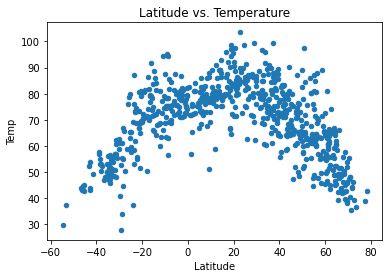

In [12]:
# Latitude vs. Temperature Plot
weather_df.plot.scatter("Latitude", "Temp")
plt.title('Latitude vs. Temperature')

Text(0.5, 1.0, 'Latitude vs. Humidity')

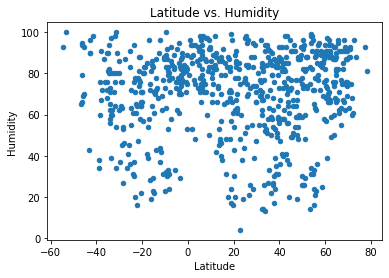

In [13]:
# Latitude vs. Humidity Plot
weather_df.plot.scatter("Latitude", "Humidity")
plt.title('Latitude vs. Humidity')

Text(0.5, 1.0, 'Latitude vs. Cloudiness')

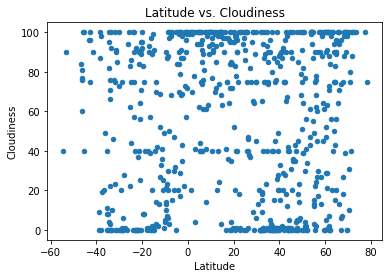

In [14]:
# Latitude vs. Cloudiness Plot
weather_df.plot.scatter("Latitude", "Cloudiness")
plt.title('Latitude vs. Cloudiness')

Text(0.5, 1.0, 'Latitude vs. Wind Speed')

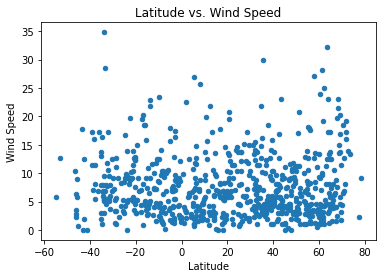

In [15]:
# Latitude vs. Wind Speed Plot
weather_df.plot.scatter("Latitude", "Wind Speed")
plt.title('Latitude vs. Wind Speed')

In [ ]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression